In [3]:
import matplotlib.pyplot as plt
import seaborn as sb
import json
import pandas as pd
from pprint import pprint
from jupyterthemes import jtplot
import requests
from config import api_key
import random
jtplot.style(theme='onedork')

In [4]:
#I downloaded the conplete Open Weather Cities list from http://bulk.openweathermap.org/sample/ and put it into my resources folder
citilistpath = "Resources/city.list.json"
#Create a dataframe with the data for all cities
citilistdf = pd.read_json(citilistpath)
citilistdf.head(5)

,coord,country,id,name
0,"{'lon': 34.283333, 'lat': 44.549999}",UA,707860,Hurzuf
1,"{'lon': 37.666668, 'lat': 55.683334}",RU,519188,Novinki
2,"{'lon': 84.633331, 'lat': 28}",NP,1283378,GorkhÄ�
3,"{'lon': 76, 'lat': 29}",IN,1270260,State of HaryÄ�na
4,"{'lon': 33.900002, 'lat': 44.599998}",UA,708546,Holubynka


In [5]:
#Method to randomly sample 500 city ids from the list of all city ids available on openweather (random.sample does not allow duplicates)
#Take the list of all IDS and select 500
#Print the length to confirm we sampled exactly 500
cityidlist = list(citilistdf['id'])
cityids = random.sample(cityidlist, 500)
print(len(cityids))

500


In [7]:
#Construct URL and all lists to store retrieved data
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial"
namelist = []
cityidlist = []
latitudelist = []
temperaturelist = []
humiditylist = []
cloudinesslist = []
windspeedlist = []
countrylist = []
#Iterate through all cityids
for cityid in cityids:
    #Construct query url using base url, api key, and the current city id
    query_url = url + "&appid=" + api_key + "&id=" + str(cityid)
    #convert to json
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    name = weather_json['name']
    #find and append proper piece of data from the weather data to the list
    namelist.append(weather_json['name'])
    cityidlist.append(weather_json['id'])
    latitudelist.append(weather_json['coord']['lat'])
    temperaturelist.append(weather_json['main']['temp'])
    humiditylist.append(weather_json['main']['humidity'])
    cloudinesslist.append(weather_json['clouds']['all'])
    windspeedlist.append(weather_json['wind']['speed'])
    countrylist.append(weather_json['sys']['country'])
    #print City Name, Country Code, City ID and URL without API Key
    print(name+","+weather_json['sys']['country']+","+str(cityid))
    print(url+"&id="+str(cityid))

Attnang-Puchheim,AT,3233832
http://api.openweathermap.org/data/2.5/weather?units=imperial&id=3233832
Sabanagrande,HN,3602680
http://api.openweathermap.org/data/2.5/weather?units=imperial&id=3602680
Albánchez,ES,6355521
http://api.openweathermap.org/data/2.5/weather?units=imperial&id=6355521
Us,FR,2971316
http://api.openweathermap.org/data/2.5/weather?units=imperial&id=2971316
Reghin,RO,668997
http://api.openweathermap.org/data/2.5/weather?units=imperial&id=668997
Leon Valley,US,4705923
http://api.openweathermap.org/data/2.5/weather?units=imperial&id=4705923
Nesselwangle,AT,2770879
http://api.openweathermap.org/data/2.5/weather?units=imperial&id=2770879
Ludchurch,GB,2643438
http://api.openweathermap.org/data/2.5/weather?units=imperial&id=2643438
Argostolion,GR,264668
http://api.openweathermap.org/data/2.5/weather?units=imperial&id=264668
Cajahs Mountain,US,4458580
http://api.openweathermap.org/data/2.5/weather?units=imperial&id=4458580
Brazii,RO,683770
http://api.openweathermap.org/data

Dagebull,DE,2939489
http://api.openweathermap.org/data/2.5/weather?units=imperial&id=2939489
Pratápolis,BR,3452380
http://api.openweathermap.org/data/2.5/weather?units=imperial&id=3452380
Greimerath,DE,6554325
http://api.openweathermap.org/data/2.5/weather?units=imperial&id=6554325
Vecoux,FR,2970256
http://api.openweathermap.org/data/2.5/weather?units=imperial&id=2970256
Aichstetten,DE,6556053
http://api.openweathermap.org/data/2.5/weather?units=imperial&id=6556053
Boltaña,ES,6358311
http://api.openweathermap.org/data/2.5/weather?units=imperial&id=6358311
Schonenbuch,CH,2658708
http://api.openweathermap.org/data/2.5/weather?units=imperial&id=2658708
Cartyville,CA,5917819
http://api.openweathermap.org/data/2.5/weather?units=imperial&id=5917819
Sao Joao Batista,BR,3448906
http://api.openweathermap.org/data/2.5/weather?units=imperial&id=3448906
Lomaso,IT,6534576
http://api.openweathermap.org/data/2.5/weather?units=imperial&id=6534576
Ponitz,DE,2852729
http://api.openweathermap.org/data/2.

Heric,FR,3013457
http://api.openweathermap.org/data/2.5/weather?units=imperial&id=3013457
Klokočov,CZ,3073574
http://api.openweathermap.org/data/2.5/weather?units=imperial&id=3073574
Qualeup,AU,2062823
http://api.openweathermap.org/data/2.5/weather?units=imperial&id=2062823
Villodrigo,ES,3104657
http://api.openweathermap.org/data/2.5/weather?units=imperial&id=3104657
Bunesti,RO,683279
http://api.openweathermap.org/data/2.5/weather?units=imperial&id=683279
Roye,FR,6442093
http://api.openweathermap.org/data/2.5/weather?units=imperial&id=6442093
Umunede,NG,2320417
http://api.openweathermap.org/data/2.5/weather?units=imperial&id=2320417
Huagai,CN,1807723
http://api.openweathermap.org/data/2.5/weather?units=imperial&id=1807723
Berstett,FR,3033219
http://api.openweathermap.org/data/2.5/weather?units=imperial&id=3033219
Thionville,FR,6454375
http://api.openweathermap.org/data/2.5/weather?units=imperial&id=6454375
East Dereham,GB,2650470
http://api.openweathermap.org/data/2.5/weather?units=imp

Finkenwerder,DE,2926732
http://api.openweathermap.org/data/2.5/weather?units=imperial&id=2926732
Ross,US,5691399
http://api.openweathermap.org/data/2.5/weather?units=imperial&id=5691399
Magadanskaya Oblast’,RU,2123627
http://api.openweathermap.org/data/2.5/weather?units=imperial&id=2123627
Bānskhoh,IN,1277225
http://api.openweathermap.org/data/2.5/weather?units=imperial&id=1277225
Waikato,NZ,2180293
http://api.openweathermap.org/data/2.5/weather?units=imperial&id=2180293
Gorcop,PK,1178148
http://api.openweathermap.org/data/2.5/weather?units=imperial&id=1178148
Laguna Seca,HN,3607802
http://api.openweathermap.org/data/2.5/weather?units=imperial&id=3607802
Chavenon,FR,6446548
http://api.openweathermap.org/data/2.5/weather?units=imperial&id=6446548
Ganwang,CN,2037306
http://api.openweathermap.org/data/2.5/weather?units=imperial&id=2037306
Rauschwitz,DE,2849857
http://api.openweathermap.org/data/2.5/weather?units=imperial&id=2849857
Saint-Gengoux-le-National,FR,2980006
http://api.openweath

Niedersohren,DE,2862862
http://api.openweathermap.org/data/2.5/weather?units=imperial&id=2862862
Al Tuhayta,YE,77655
http://api.openweathermap.org/data/2.5/weather?units=imperial&id=77655
Zeleny Hay,UA,687345
http://api.openweathermap.org/data/2.5/weather?units=imperial&id=687345
Streaky Bay,AU,7839460
http://api.openweathermap.org/data/2.5/weather?units=imperial&id=7839460
Eidfjord,NO,3158668
http://api.openweathermap.org/data/2.5/weather?units=imperial&id=3158668
Kelburn,NZ,2188922
http://api.openweathermap.org/data/2.5/weather?units=imperial&id=2188922
Carbon County,US,5536454
http://api.openweathermap.org/data/2.5/weather?units=imperial&id=5536454
Pouancé,FR,6435268
http://api.openweathermap.org/data/2.5/weather?units=imperial&id=6435268
Anavra,GR,265095
http://api.openweathermap.org/data/2.5/weather?units=imperial&id=265095
Kosi,IN,1266073
http://api.openweathermap.org/data/2.5/weather?units=imperial&id=1266073
Tumut Shire,AU,7839368
http://api.openweathermap.org/data/2.5/weather?

Krumstedt,DE,2883238
http://api.openweathermap.org/data/2.5/weather?units=imperial&id=2883238
Barbata,IT,6534955
http://api.openweathermap.org/data/2.5/weather?units=imperial&id=6534955
Tordehumos,ES,6362286
http://api.openweathermap.org/data/2.5/weather?units=imperial&id=6362286
Kolyberovo,RU,546013
http://api.openweathermap.org/data/2.5/weather?units=imperial&id=546013
Vasil’sursk,RU,476732
http://api.openweathermap.org/data/2.5/weather?units=imperial&id=476732
Hejiang,CN,1808612
http://api.openweathermap.org/data/2.5/weather?units=imperial&id=1808612
Mailing,DE,2874267
http://api.openweathermap.org/data/2.5/weather?units=imperial&id=2874267
Cicevac,RS,791936
http://api.openweathermap.org/data/2.5/weather?units=imperial&id=791936
Miaoling,CN,7745048
http://api.openweathermap.org/data/2.5/weather?units=imperial&id=7745048
San Antonio,PH,1690303
http://api.openweathermap.org/data/2.5/weather?units=imperial&id=1690303
Kinheim,DE,6554339
http://api.openweathermap.org/data/2.5/weather?uni

In [8]:
#Print the length of the lists to confirm the data was collected properly
print(len(namelist))
print(len(countrylist))
print(len(latitudelist))
print(len(temperaturelist))
print(len(humiditylist))
print(len(cloudinesslist))
print(len(windspeedlist))

500
500
500
500
500
500
500


In [10]:
#Create a dictionary to store all the collected data
weather_dict = {
    'Name': namelist,
    'ID': cityidlist,
    'Country': countrylist,
    'Cloudiness (%)': cloudinesslist,
    'Temperature (F)': temperaturelist,
    'Latitude (Deg)': latitudelist,
    'Humidity (%)': humiditylist,
    'Wind Speed (mph)': windspeedlist
}
#Convert to dataframe and label columns
weatherdf = pd.DataFrame(weather_dict, columns=('Name','ID', 'Country','Temperature (F)','Latitude (Deg)','Humidity (%)','Cloudiness (%)','Wind Speed (mph)'))
weatherdf.head()

,Name,ID,Country,Temperature (F),Latitude (Deg),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Attnang-Puchheim,3233832,AT,57.20,48.01,67,20,4.70
1,Sabanagrande,3602680,HN,82.40,13.81,48,40,8.05
2,Albánchez,6355521,ES,59.00,37.29,67,0,3.36
3,Us,2971316,FR,50.20,49.10,76,75,12.75
4,Reghin,668997,RO,52.77,46.77,81,36,2.24


In [26]:
#Convert this dataframe to a csv and put in in the Output folder
weatherdf.to_csv("Output/weather_data_csv")

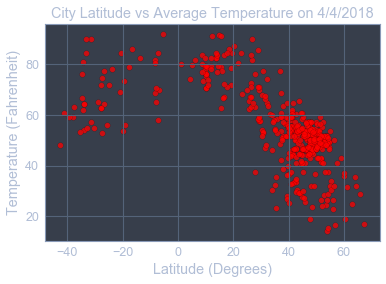

In [27]:
#Create Scatter Plot, label and save it to a png in the Output folder, then display the plot
plt.scatter(latitudelist, temperaturelist, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlabel("Latitude (Degrees)")
plt.ylabel("Temperature (Fahrenheit)")
plt.title("City Latitude vs Average Temperature on 4/4/2018")
plt.savefig("Output/Latitude_vs_Temperature")
#plt.grid()
plt.show()

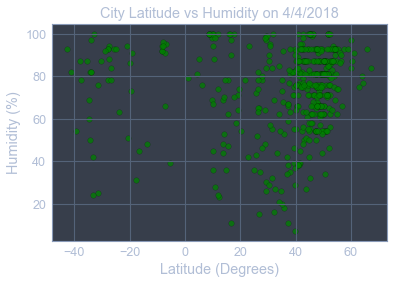

In [28]:
#Create Scatter Plot, label and save it to a png in the Output folder, then display the plot
plt.scatter(latitudelist, humiditylist, marker="o", facecolors="green", edgecolors="black", alpha=0.75)
plt.xlabel("Latitude (Degrees)")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity on 4/4/2018")
plt.savefig("Output/Latitude_vs_Humidity")
#plt.grid()
plt.show()

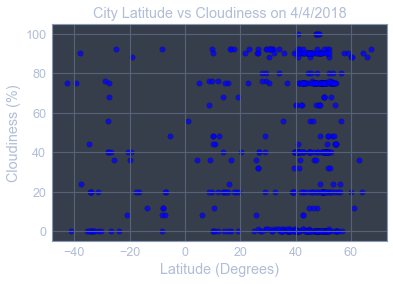

In [29]:
#Create Scatter Plot, label and save it to a png in the Output folder, then display the plot
plt.scatter(latitudelist, cloudinesslist, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.xlabel("Latitude (Degrees)")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness on 4/4/2018")
plt.savefig("Output/Latitude_vs_Cloudiness")
#plt.grid()
plt.show()

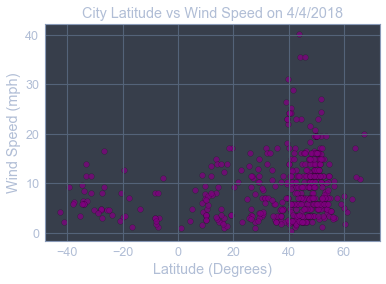

In [30]:
#Create Scatter Plot, label and save it to a png in the Output folder, then display the plot
plt.scatter(latitudelist, windspeedlist, marker="o", facecolors="purple", edgecolors="black", alpha=0.75)
plt.xlabel("Latitude (Degrees)")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed on 4/4/2018")
plt.savefig("Output/Latitude_vs_Wind_Speed")
#plt.grid()
plt.show()

In [ ]:
#Three Observable Trends
# 1. Temperature is a lot warmer in the Southern Hemisphere than the Northern Hemisphere. But the warmest points are nearest to the equator.
# 2. There were a lot more sampled cities in the Northern Hemisphere (Likely a lot more cities in the Northern Hemisphere for the open weather database)
# 3. Latitude did not have a strong effect on humidity, wind speed, or cloudiness for the sampled day.